<a href="https://colab.research.google.com/github/Whaleman0423/class_no.4_paper/blob/main/%E6%A9%9F%E8%BB%8A%E4%BA%8C%E6%89%8B%E5%83%B9%E5%9B%9E%E6%AD%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [371]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [372]:
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/Tebame_第四組_機車辨識/二手車價/yamah勁戰2.csv")
df

,標題,出廠年份,二手價,里程
0,山葉/Yamaha - ★山葉勁戰 三代勁戰 125★嚴選推薦.輕鬆買.輕鬆繳,2013年,3.5萬,未填寫
1,山葉/Yamaha - ★山葉勁戰 二代勁戰 125★嚴選推薦.輕鬆買.輕鬆繳,2011年,2.8萬,未填寫
2,山葉/Yamaha - 山葉 二代勁戰125 滿18即可分期 下殺流血價,2008年,1.9萬,未填寫
3,山葉/Yamaha - 已出售請勿再來電,2014年,3.2萬,2.2萬 公里
4,山葉/Yamaha - 自售新勁戰2,2008年,1.6萬,6.5萬 公里
...,...,...,...,...
258,山葉/Yamaha - 原廠無改無事故無泡水,2010年,5.0萬,1.3萬 公里
259,山葉/Yamaha - 08年新勁戰,2008年,4.3萬,1.5萬 公里
260,山葉/Yamaha - 自售 2008年12月出廠新勁戰改58.5 有力車況超優 3.9萬不...,2008年,3.9萬,1.8萬 公里
261,山葉/Yamaha - 2012年7月出廠9月領牌.漂亮如新山葉新勁戰(含過戶)便宜賣.可分...,2012年,6.9萬,0.4萬 公里


In [373]:
# 留下里程數跟二手價 去除掉里程數未填寫的項目
df = pd.DataFrame(
    {
       "里程數":[df["里程"][i].replace("公里", "") for i in range(len(df)) if not "未填寫" in df["里程"][i]],
       "二手價":[float(df["二手價"][i].replace("萬", ""))*10000.0 for i in range(len(df)) if not "未填寫" in df["里程"][i]]
     }
    )
df

,里程數,二手價
0,2.2萬,32000.0
1,6.5萬,16000.0
2,3.0萬,33000.0
3,2.7萬,30000.0
4,7.1萬,18000.0
...,...,...
200,1.3萬,50000.0
201,1.5萬,43000.0
202,1.8萬,39000.0
203,0.4萬,69000.0


In [374]:
#  更改里程數單位
for r in range(len(df)):
  if "萬" in df["里程數"][r]:
    df["里程數"][r] = float(df["里程數"][r].replace("萬", ""))*10000.0
  else:
    df["里程數"][r] = float(df["里程數"][r])
df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,里程數,二手價
0,22000,32000.0
1,65000,16000.0
2,30000,33000.0
3,27000,30000.0
4,71000,18000.0
...,...,...
200,13000,50000.0
201,15000,43000.0
202,18000,39000.0
203,4000,69000.0


In [375]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df["里程數"],df['二手價'], test_size=0.1)

In [376]:
x_train

92      7000
181    10000
20       101
12      6000
52     15000
       ...  
170        3
183    50000
0      22000
169     7000
50      6000
Name: 里程數, Length: 184, dtype: object

In [377]:
from sklearn.tree import DecisionTreeRegressor
reg = DecisionTreeRegressor(max_depth=5)
reg.fit(x_train.to_frame(), y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=5,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

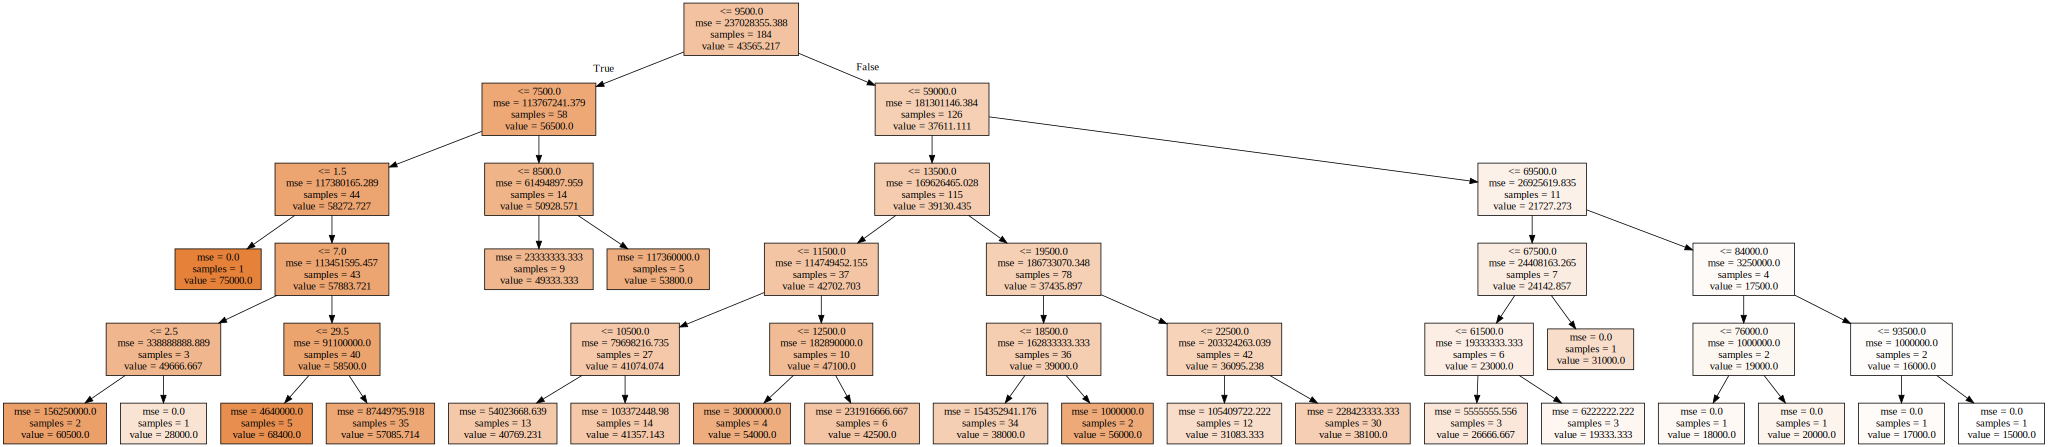

In [378]:
from sklearn.tree import export_graphviz
import graphviz
import numpy as np
import matplotlib.pyplot as plt
F = np.array(["里程數"])
g = export_graphviz(reg, 
          out_file=None, 
          feature_names=F,
          filled=True
        )
graph = graphviz.Source(g)
graph

In [379]:
pre = reg.predict(x_test.to_frame())
# pre
print("預測結果：", list(pre))
print("實際結果：", list(y_test))
from sklearn.metrics import r2_score
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html
print("r2 score：", r2_score(y_test, pre))

預測結果： [38000.0, 57085.71428571428, 38000.0, 17000.0, 57085.71428571428, 31083.333333333332, 54000.0, 38100.0, 38100.0, 38000.0, 57085.71428571428, 19333.333333333332, 38100.0, 40769.230769230766, 38100.0, 57085.71428571428, 42500.0, 38100.0, 56000.0, 31083.333333333332, 40769.230769230766]
實際結果： [51000.0, 68000.0, 25000.0, 16000.0, 68000.0, 26000.0, 34000.0, 35000.0, 55000.0, 43000.0, 49000.0, 25000.0, 55000.0, 33000.0, 52000.0, 65000.0, 50000.0, 25000.0, 49000.0, 23000.0, 55000.0]
r2 score： 0.4933196184857853
